# 03_Linear_Regression_Model

In [1]:
import torch
from torch.autograd import Variable
from torch import nn

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(1)

### Prepare Data

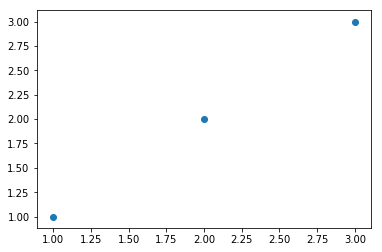

In [3]:
# X and Y training data

x_train = torch.Tensor([[1], [2], [3]])
y_train = torch.Tensor([[1], [2], [3]])

# x_train = torch.Tensor([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
#                     [9.779], [6.182], [7.59], [2.167], [7.042], 
#                     [10.791], [5.313], [7.997], [3.1]])

# y_train = torch.Tensor([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
#                     [3.366], [2.596], [2.53], [1.221], [2.827], 
#                     [3.465], [1.65], [2.904], [1.3]])

x, y = Variable(x_train), Variable(y_train)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

## Naive Linear Regression Model

### Define Linear Regression Model

In [5]:
W = Variable(torch.rand(1,1))
x, W, x.mm(W)

(Variable containing:
  1
  2
  3
 [torch.FloatTensor of size 3x1], Variable containing:
  0.4170
 [torch.FloatTensor of size 1x1], Variable containing:
  0.4170
  0.8340
  1.2511
 [torch.FloatTensor of size 3x1])

### Training Linear Regression Model

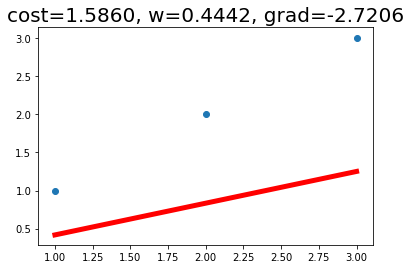

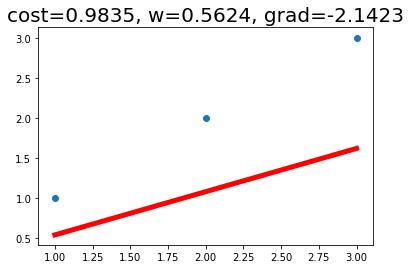

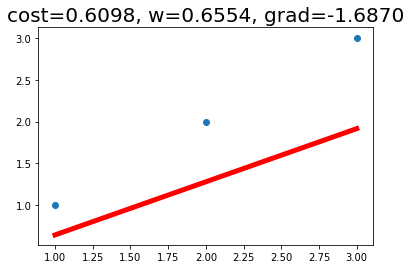

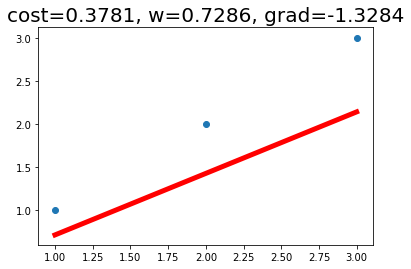

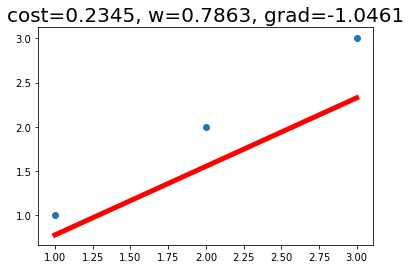

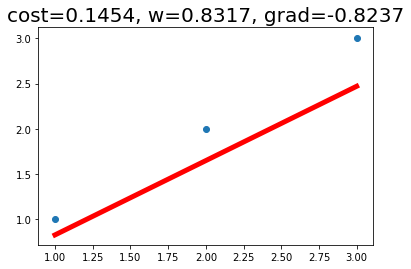

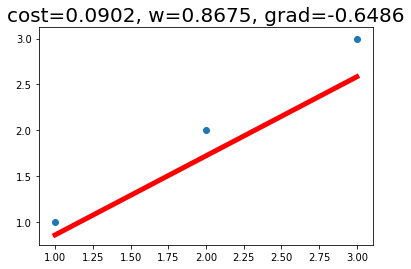

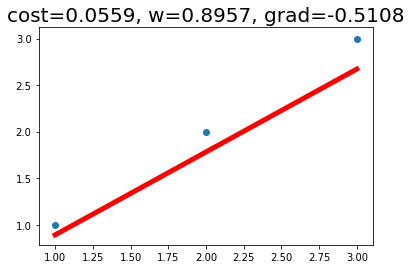

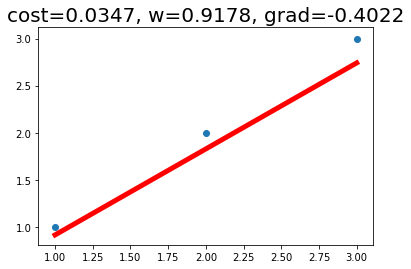

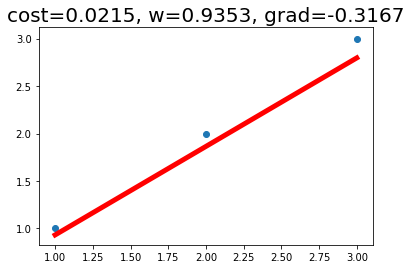

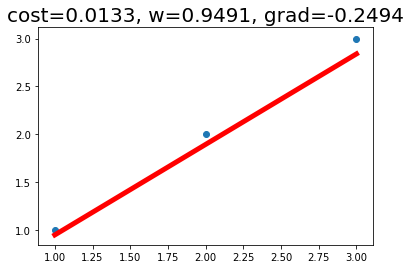

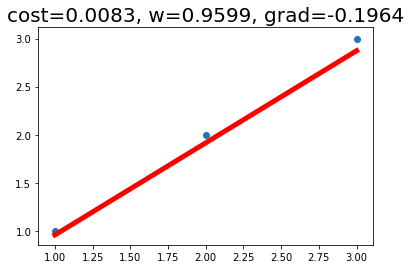

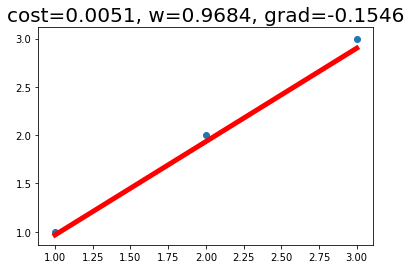

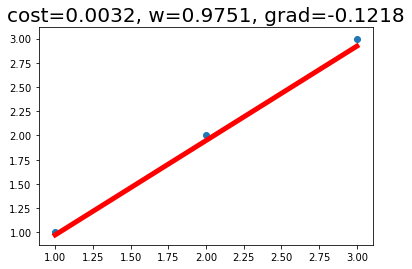

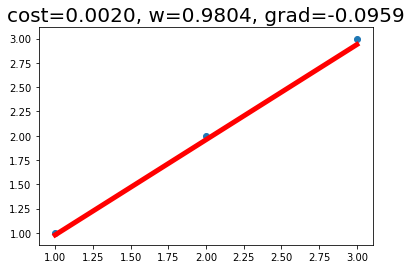

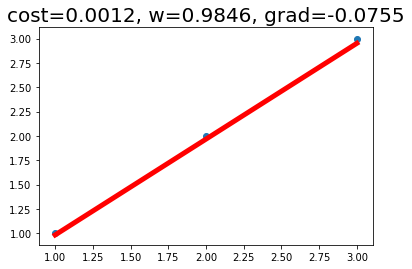

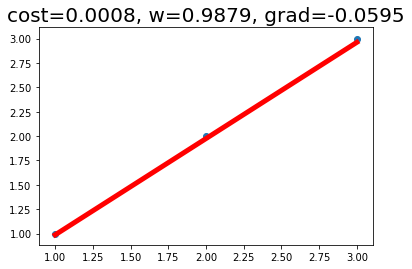

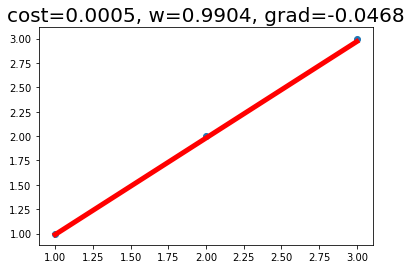

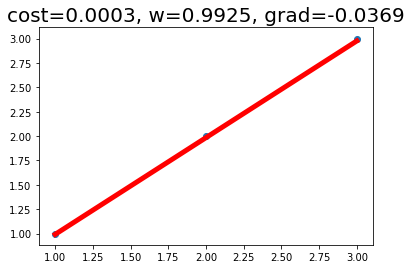

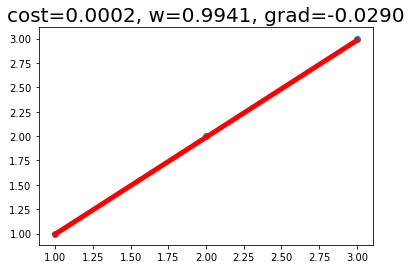

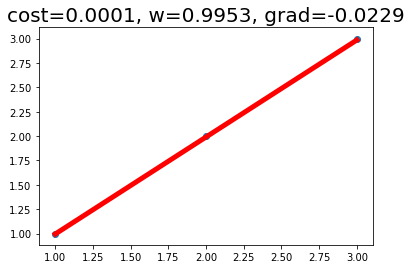

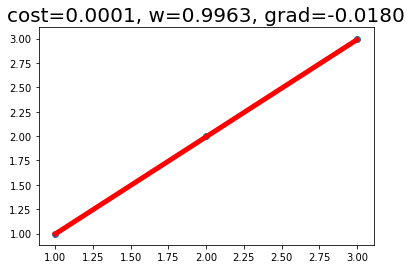

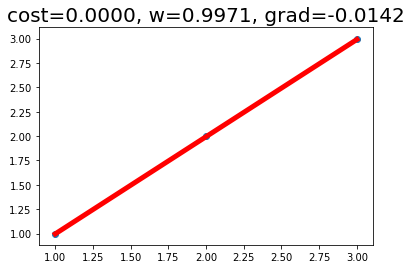

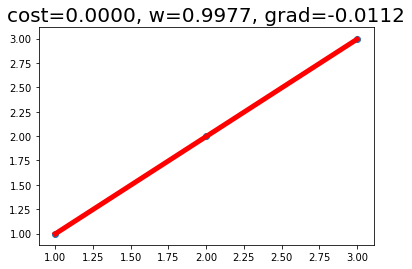

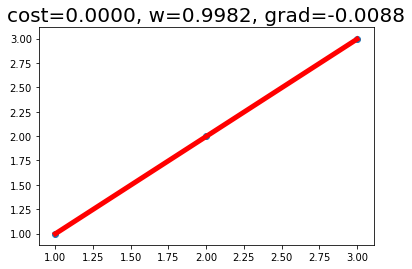

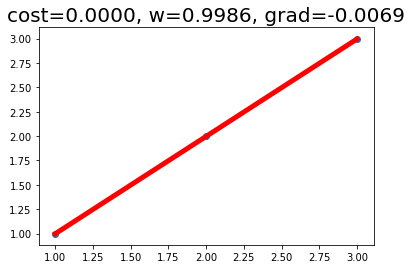

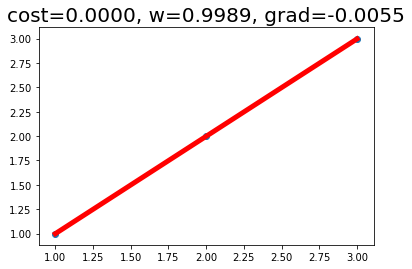

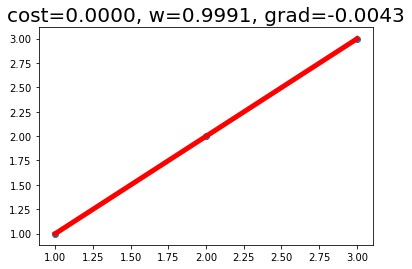

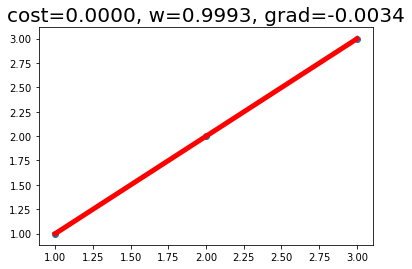

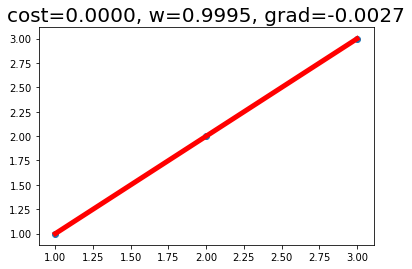

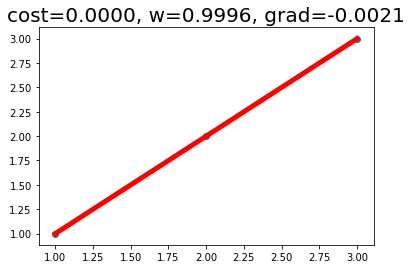

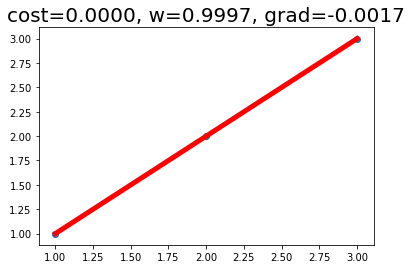

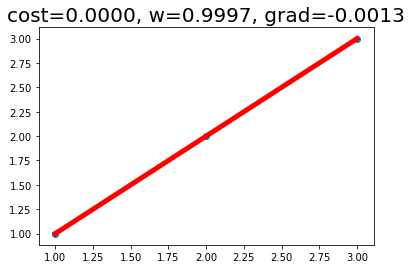

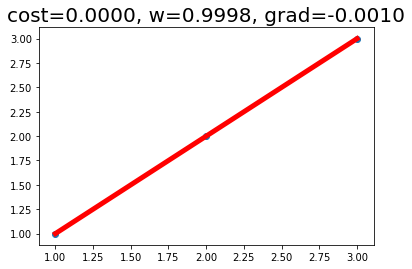

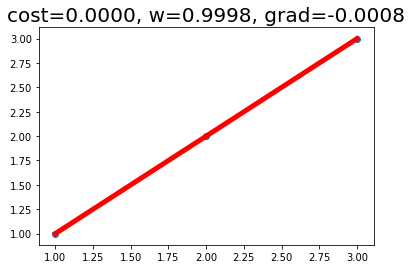

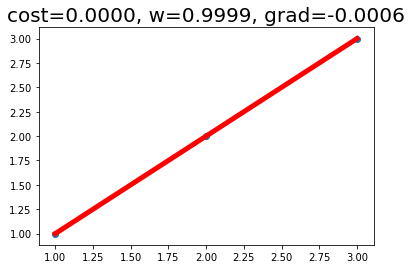

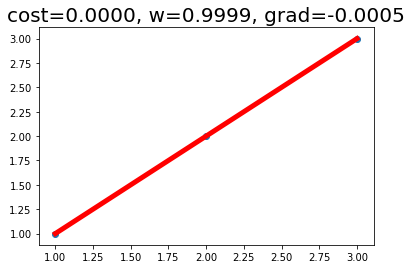

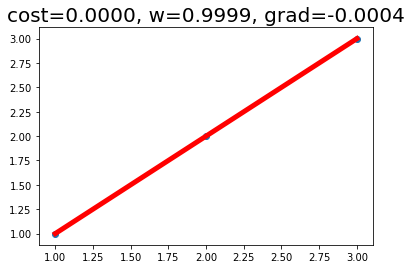

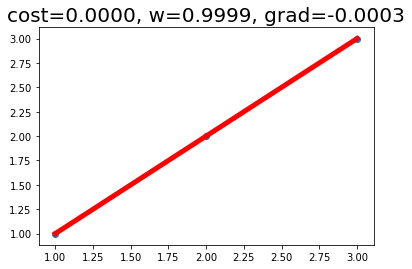

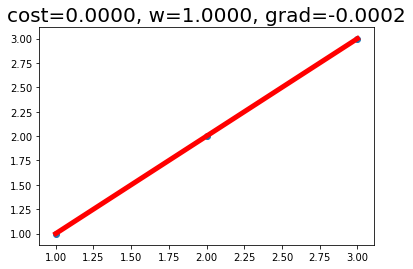

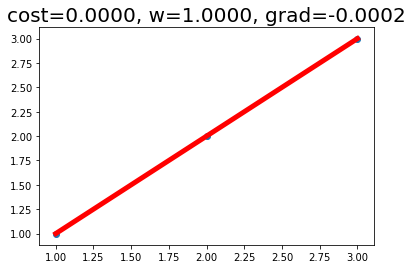

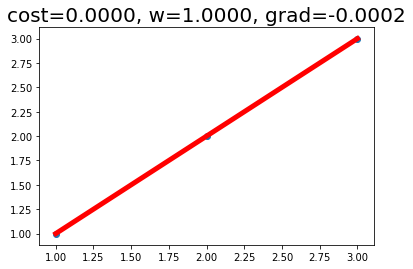

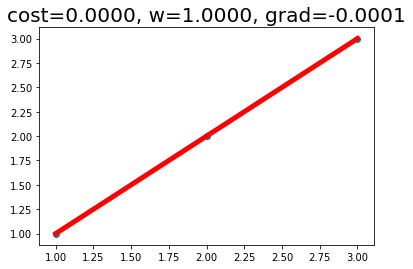

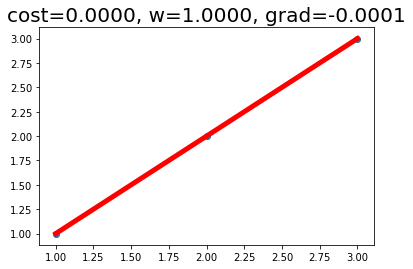

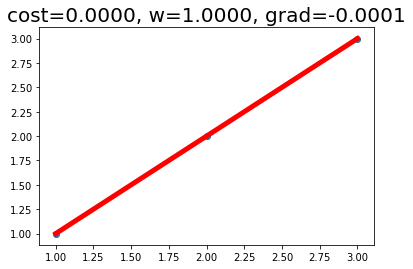

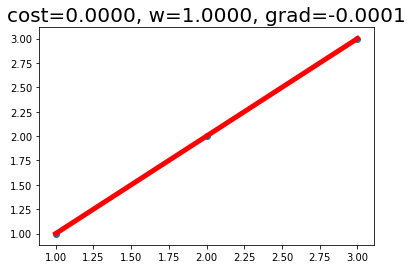

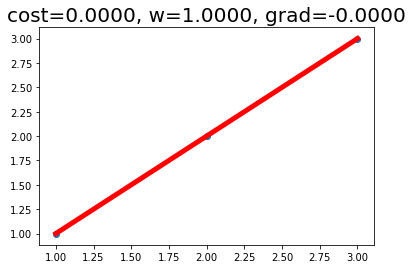

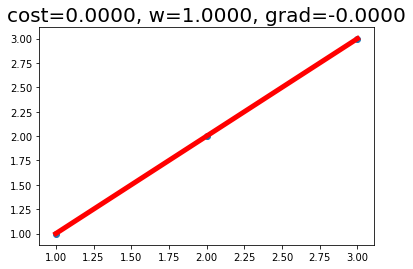

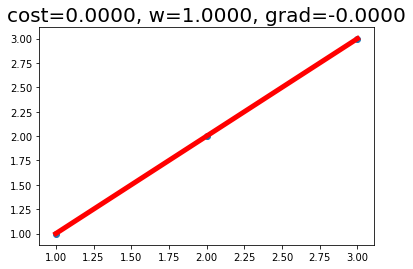

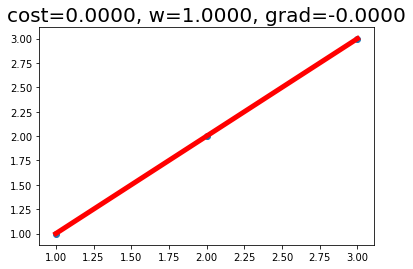

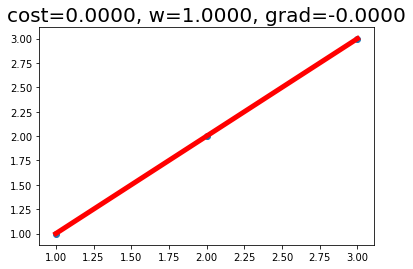

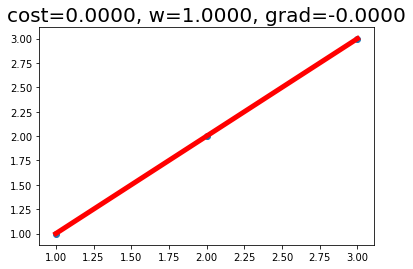

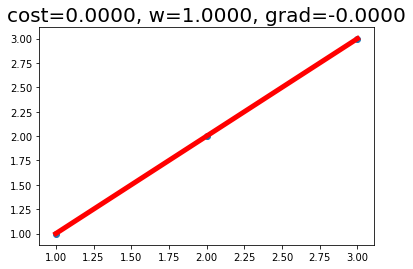

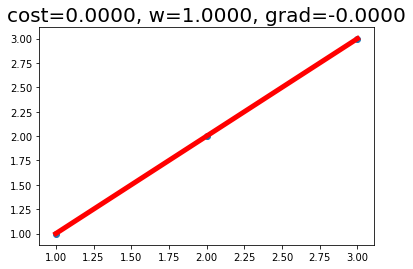

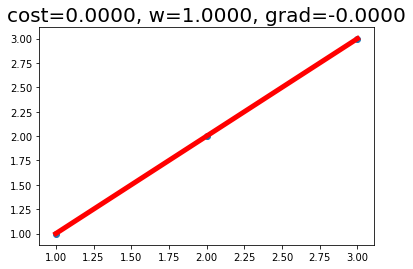

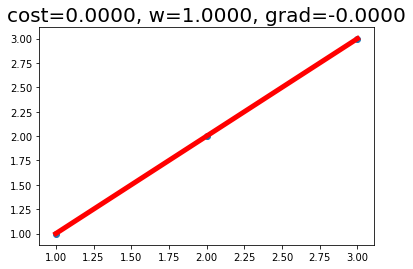

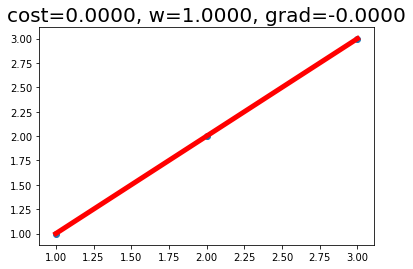

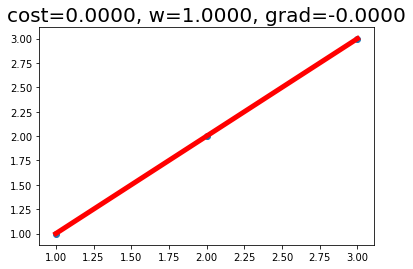

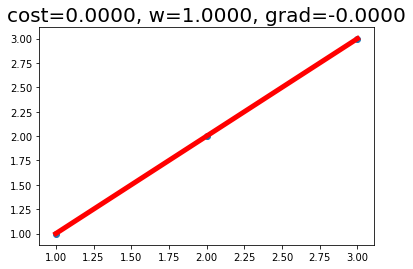

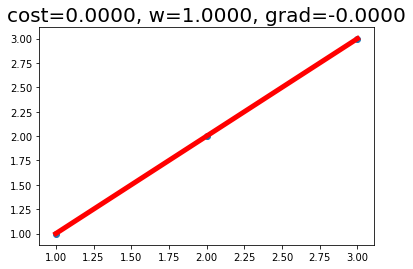

Linear Model Optimization is Done!


In [6]:
plt.ion()   # something about plotting

cost_func = nn.MSELoss()                 # Our mean squared Cost function 
lr = 0.01

for step in range(300):

    prediction = x.mm(W)                       # Our Model XW
    cost = cost_func(prediction, y)            # must be (1. prediction, 2. training target y) 
    gradient = (prediction-y).view(-1).dot(x.view(-1)) / len(x)  # Compute Gradient of cost w.r.t W (dCost/dW) 
    W -= lr * gradient                         # Update weight parameter with learning lr
    

    if step % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.title('cost=%.4f, w=%.4f, grad=%.4f' % (cost.data[0], W.data[0][0], gradient.data[0]), fontdict={'size': 20} )
        plt.show()
        plt.pause(0.1)
        
print('Linear Model Optimization is Done!')

plt.ioff()

### Prediction (Test)

In [10]:
x_test = Variable(torch.Tensor([[5]]))
y_test = x_test.mm(W)
print(y_test)

Variable containing:
 5.0000
[torch.FloatTensor of size 1x1]



## Linear Regression Model w/ nn Module

### Define Linear Regression Model w/ nn Module

In [11]:
model = nn.Linear(1, 1, bias=True)    # Our Model XW+b
cost_func = nn.MSELoss()        # Our mean squared Cost function 

print(model)  # model
model.weight, model.bias

Linear (1 -> 1)


(Parameter containing:
  0.9944
 [torch.FloatTensor of size 1x1], Parameter containing:
  0.4406
 [torch.FloatTensor of size 1])

### Training Your Model w/ optim Module

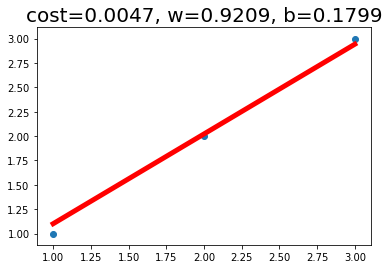

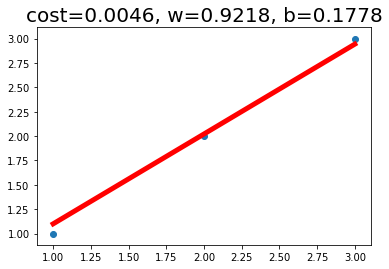

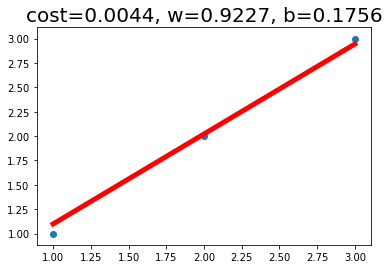

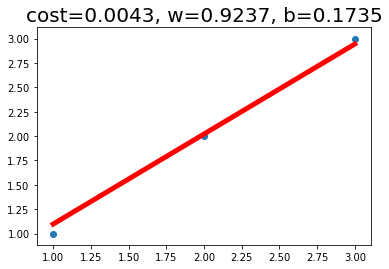

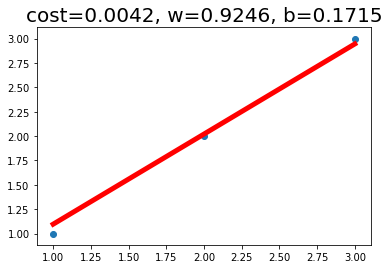

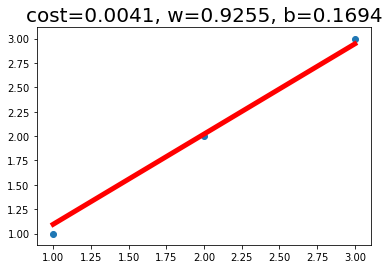

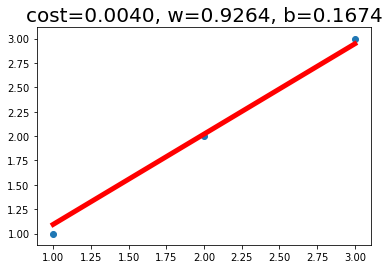

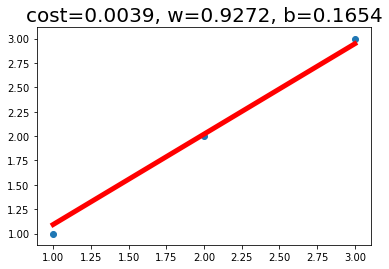

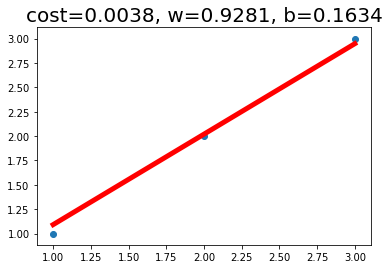

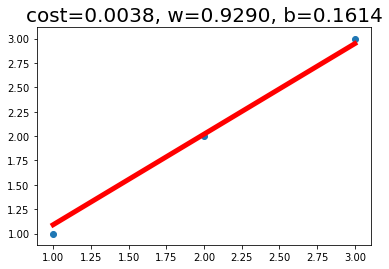

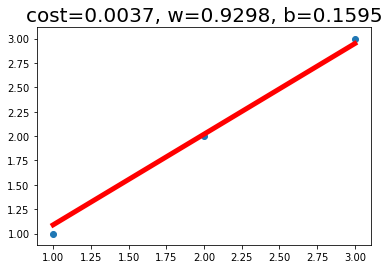

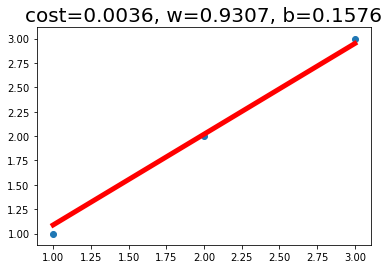

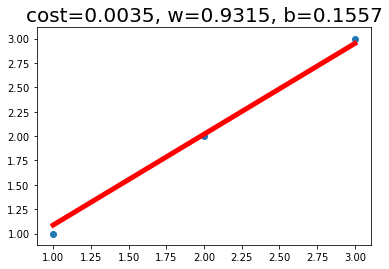

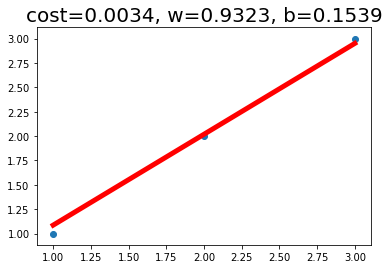

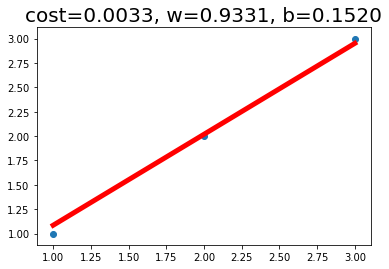

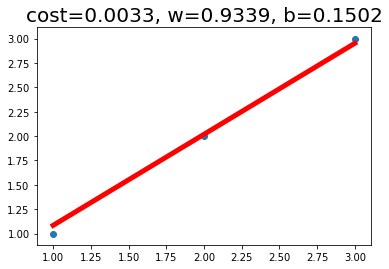

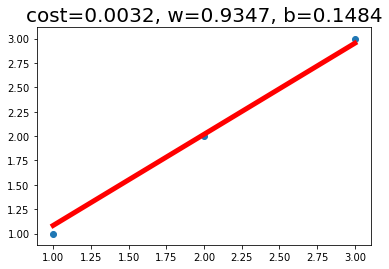

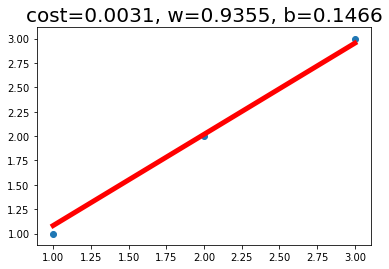

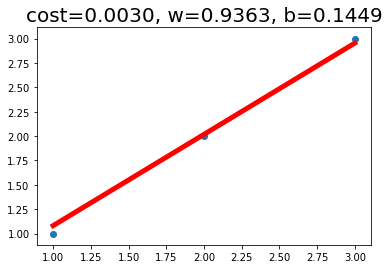

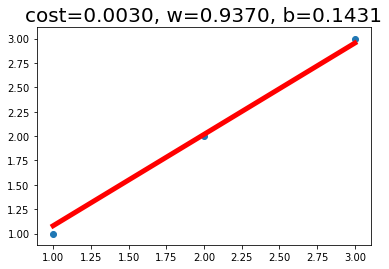

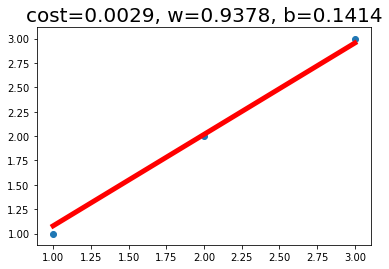

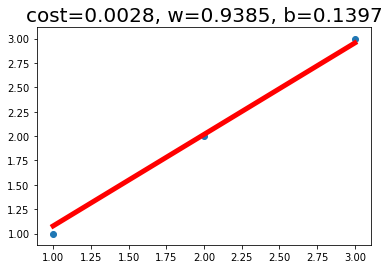

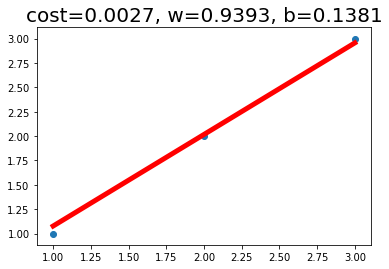

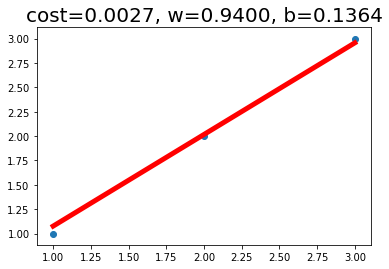

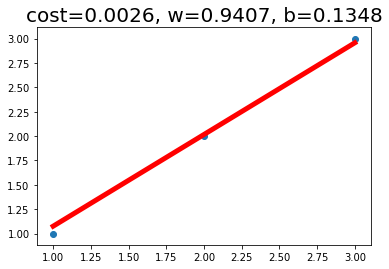

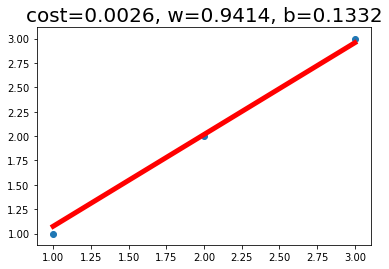

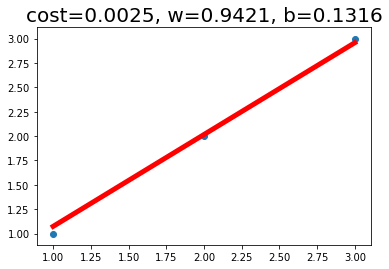

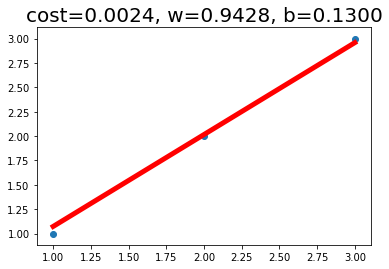

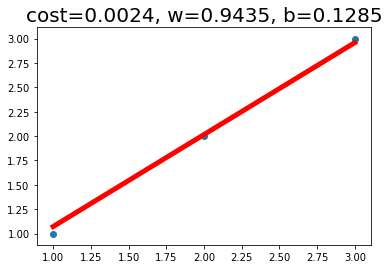

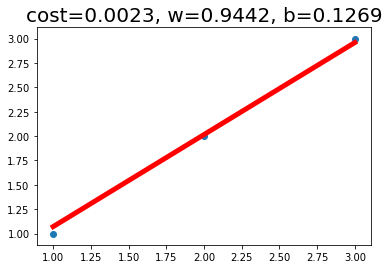

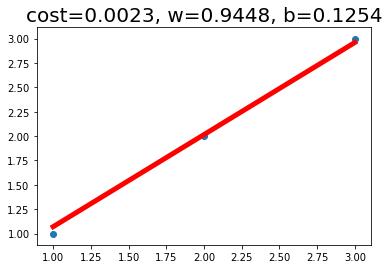

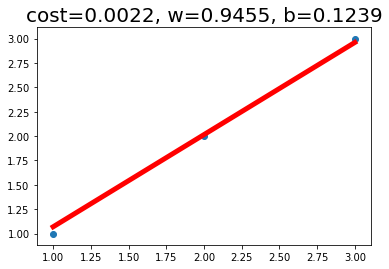

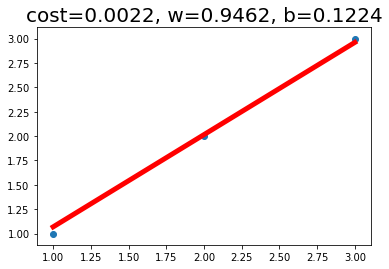

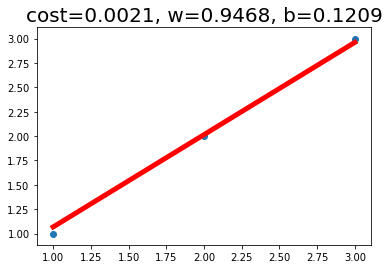

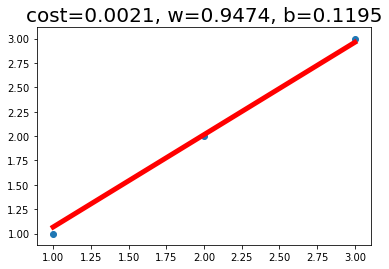

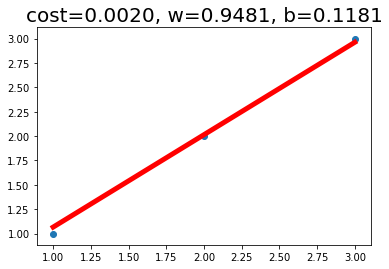

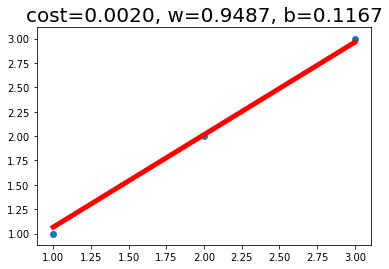

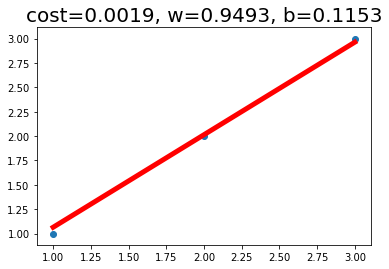

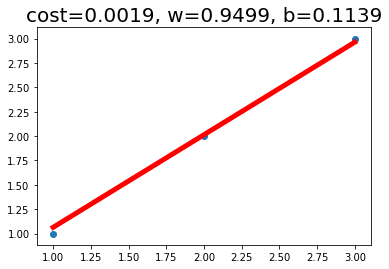

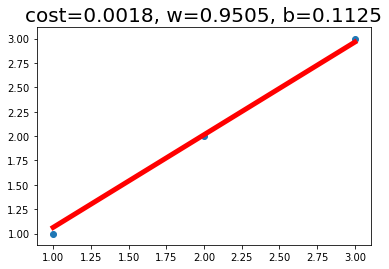

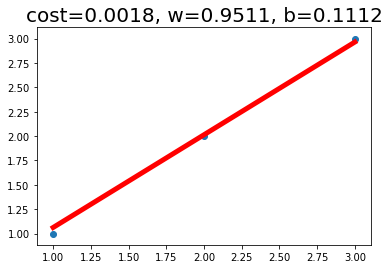

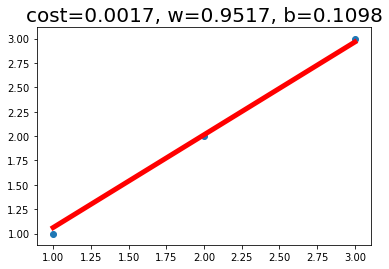

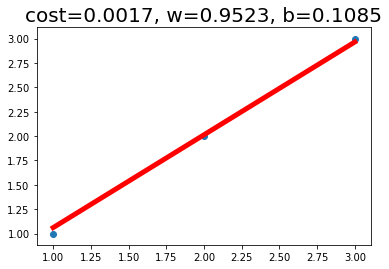

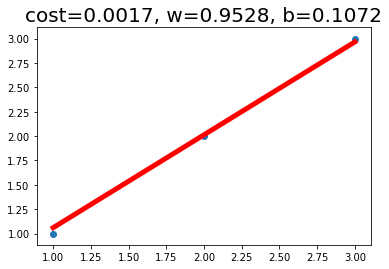

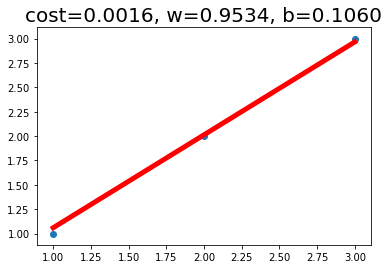

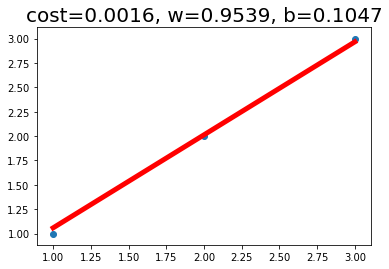

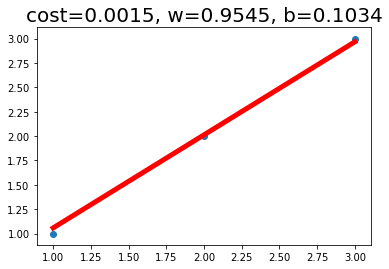

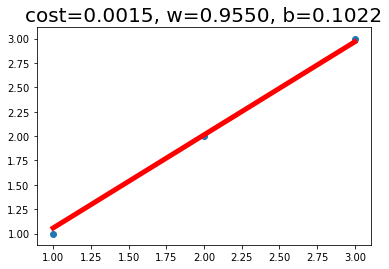

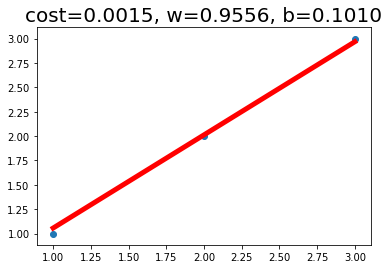

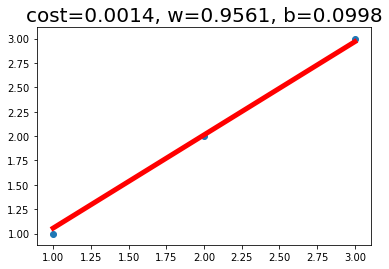

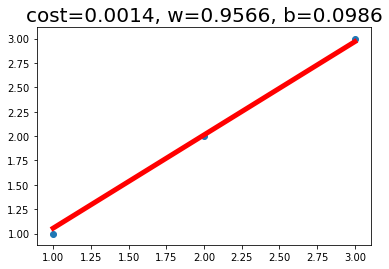

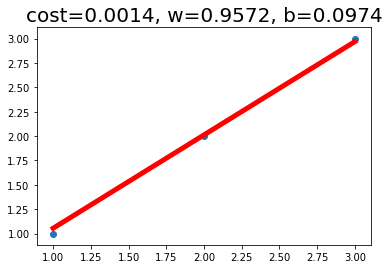

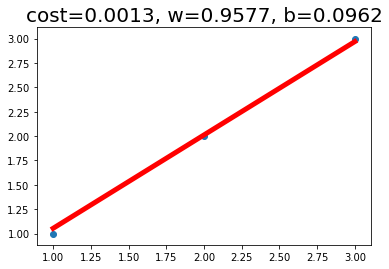

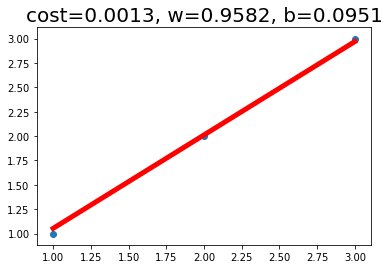

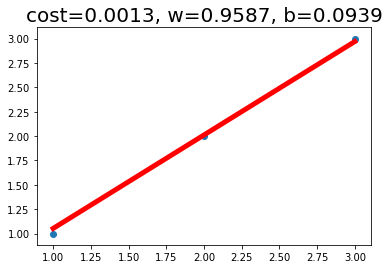

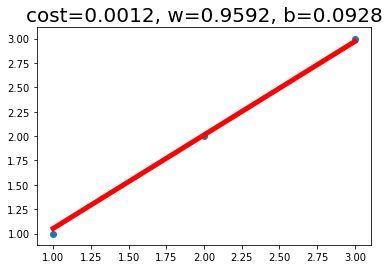

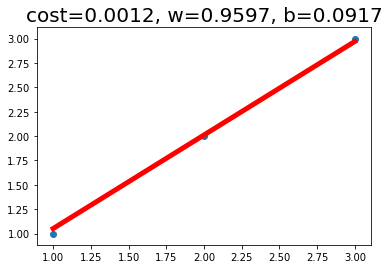

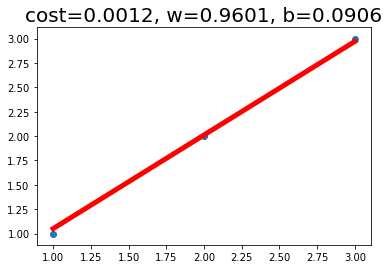

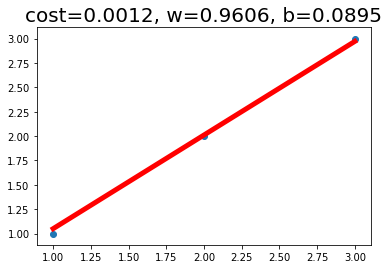

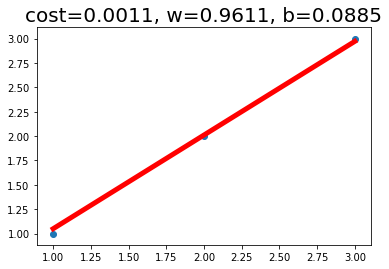

Linear Model Optimization is Done!


In [14]:
plt.ion()   # something about plotting

optimizer = torch.optim.SGD(model.parameters(), lr= 0.01)

for step in range(300):
    
    prediction = model(x)               # input x and predict based on x
    cost = cost_func(prediction, y)     # must be (1. prediction, 2. training target y)

    optimizer.zero_grad()               # clear gradients for next traing
    
    cost.backward()                     # compute gradient value of parameters
    optimizer.step()                    # update gradients


    #print ('dL/dw: ', model.weight.grad) 
    #print ('dL/db: ', model.bias.grad)
    
    if step % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.title('cost=%.4f, w=%.4f, b=%.4f' % (cost.data[0], model.weight.data[0][0],model.bias.data[0]), fontdict={'size': 20} )
        plt.show()
        plt.pause(0.1)
        
print('Linear Model Optimization is Done!')

plt.ioff()

In [15]:
x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input: %.4f, output: %.4f' % (x_test.data[0][0], y_test.data[0][0]) )

input: 7.0000, output: 6.8178


###  Is "nn.MSELoss()"  Convex Cost Function?

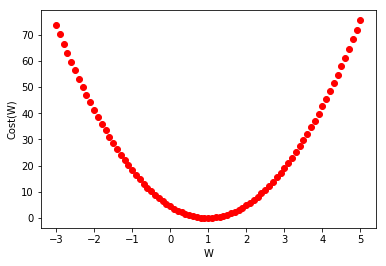

In [44]:
W_val, cost_val = [], []

for i in range(-30, 51):
    W = i*0.1
    model.weight.data.fill_(W)
    cost = cost_func(model(x),y)
    
    #print('{:.2f}, {:.2f}'.format(W, cost.data[0]))
    W_val.append(W)
    cost_val.append(cost.data[0])

# ------------------------------------------ #
plt.plot(W_val, cost_val, 'ro')
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

## Multivariate Linear Regression

In [16]:
import numpy as np

### Loading Multivariate Data

In [17]:
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print('shape: ', x_data.shape, '\nlength:', len(x_data), '\n', x_data )
print('shape: ', y_data.shape, '\nlength:', len(y_data), '\n', y_data )

x, y = Variable(torch.from_numpy(x_data)), Variable(torch.from_numpy(y_data))

shape:  (25, 3) 
length: 25 
 [[  73.   80.   75.]
 [  93.   88.   93.]
 [  89.   91.   90.]
 [  96.   98.  100.]
 [  73.   66.   70.]
 [  53.   46.   55.]
 [  69.   74.   77.]
 [  47.   56.   60.]
 [  87.   79.   90.]
 [  79.   70.   88.]
 [  69.   70.   73.]
 [  70.   65.   74.]
 [  93.   95.   91.]
 [  79.   80.   73.]
 [  70.   73.   78.]
 [  93.   89.   96.]
 [  78.   75.   68.]
 [  81.   90.   93.]
 [  88.   92.   86.]
 [  78.   83.   77.]
 [  82.   86.   90.]
 [  86.   82.   89.]
 [  78.   83.   85.]
 [  76.   83.   71.]
 [  96.   93.   95.]]
shape:  (25, 1) 
length: 25 
 [[ 152.]
 [ 185.]
 [ 180.]
 [ 196.]
 [ 142.]
 [ 101.]
 [ 149.]
 [ 115.]
 [ 175.]
 [ 164.]
 [ 141.]
 [ 141.]
 [ 184.]
 [ 152.]
 [ 148.]
 [ 192.]
 [ 147.]
 [ 183.]
 [ 177.]
 [ 159.]
 [ 177.]
 [ 175.]
 [ 175.]
 [ 149.]
 [ 192.]]


### Define Multivariabe Linear Regression Model

In [18]:
# Our hypothesis XW+b
mv_model = nn.Linear(3, 1, bias=True)

print( mv_model )
print( 'weight: ', mv_model.weight ) 
print( 'bias: ', mv_model.bias ) 

Linear (3 -> 1)
weight:  Parameter containing:
 0.4995 -0.5772 -0.4294
[torch.FloatTensor of size 1x3]

bias:  Parameter containing:
-0.2282
[torch.FloatTensor of size 1]



### Train Your Model

In [19]:
# cost criterion
cost_func = nn.MSELoss()

# Minimize
optimizer = torch.optim.SGD(mv_model.parameters(), lr=1e-5)

# Train the model
for step in range(2001):
    optimizer.zero_grad()
    
    # Our model
    prediction = mv_model(x)
    cost = cost_func(prediction, y)
    cost.backward() 
    
    print(mv_model.weight.grad)
    print(mv_model.bias.grad)
    print(mv_model.weight)
    print(mv_model.bias)
    
    optimizer.step()

    if step % 50 == 0:
        print(step, "Cost: ", cost.data.numpy(), "\nPrediction:\n", prediction.data.t().numpy())


Variable containing:
-32845.2070 -33052.7227 -33844.1680
[torch.FloatTensor of size 1x3]

Variable containing:
-407.3100
[torch.FloatTensor of size 1]

Parameter containing:
 0.4995 -0.5772 -0.4294
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2282
[torch.FloatTensor of size 1]

0 Cost:  [ 42339.11328125] 
Prediction:
 [[-42.14944458 -44.50700378 -46.94834137 -51.78659821 -31.92137146
  -23.92541885 -41.54284668 -34.84147644 -41.02066803 -38.96268463
  -37.51635742 -34.56019592 -47.6887207  -38.29379272 -40.89556122
  -46.37242889 -33.76015472 -51.65512848 -46.30741119 -42.24254608
  -47.55856323 -42.8223877  -45.67778015 -40.66506195 -46.753479  ]]
Variable containing:
-19961.8867 -20098.4922 -20587.7891
[torch.FloatTensor of size 1x3]

Variable containing:
-247.6871
[torch.FloatTensor of size 1]

Parameter containing:
 0.8279 -0.2467 -0.0910
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2242
[torch.FloatTensor of size 1]

Variable containing:
-12128.1504 -1222

Parameter containing:
 1.3146  0.2678  0.4546
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2178
[torch.FloatTensor of size 1]

Variable containing:
 24.2207  -1.9539 -21.6300
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -4.7995
[torch.FloatTensor of size 1]

Parameter containing:
 1.3143  0.2678  0.4549
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2178
[torch.FloatTensor of size 1]

Variable containing:
 24.2150  -1.9551 -21.6220
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -4.7924
[torch.FloatTensor of size 1]

Parameter containing:
 1.3141  0.2679  0.4551
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2178
[torch.FloatTensor of size 1]

Variable containing:
 24.2089  -1.9566 -21.6144
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -4.7858
[torch.FloatTensor of size 1]

Parameter containing:
 1.3138  0.2679  0.4553
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2178
[to

Parameter containing:
-0.2178
[torch.FloatTensor of size 1]

Variable containing:
 23.5925  -2.1091 -20.8697
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -4.1352
[torch.FloatTensor of size 1]

Parameter containing:
 1.2897  0.2699  0.4767
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2178
[torch.FloatTensor of size 1]

200 Cost:  [ 24.16224098] 
Prediction:
 [[ 151.28067017  187.81538391  182.03620911  197.72106934  145.11778259
   106.77400208  145.45573425  104.11896515  176.2175293   162.51705933
   142.4690094   142.88574219  188.75149536  158.06533813  146.95222473
   189.51554871  153.04222107  172.87895203  179.10949707  159.49243164
   171.65866089  175.26094055  163.30638123  154.05259705  193.98765564]]
Variable containing:
 23.5875  -2.1095 -20.8614
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -4.1276
[torch.FloatTensor of size 1]

Parameter containing:
 1.2895  0.2700  0.4770
[torch.FloatTensor of size 1x3]

Parame

Parameter containing:
 1.2643  0.2723  0.4991
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 22.9411  -2.2588 -20.0878
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -3.4495
[torch.FloatTensor of size 1]

Parameter containing:
 1.2641  0.2723  0.4993
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 22.9357  -2.2598 -20.0805
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -3.4429
[torch.FloatTensor of size 1]

Parameter containing:
 1.2639  0.2724  0.4995
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 22.9301  -2.2608 -20.0733
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -3.4365
[torch.FloatTensor of size 1]

Parameter containing:
 1.2636  0.2724  0.4997
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[to

Variable containing:
 22.3238  -2.3925 -19.3590
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -2.8085
[torch.FloatTensor of size 1]

Parameter containing:
 1.2399  0.2748  0.5204
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 22.3181  -2.3936 -19.3522
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -2.8026
[torch.FloatTensor of size 1]

Parameter containing:
 1.2397  0.2749  0.5206
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 22.3124  -2.3948 -19.3456
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -2.7967
[torch.FloatTensor of size 1]

Parameter containing:
 1.2394  0.2749  0.5208
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 22.3072  -2.3956 -19.3384
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-0


Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 21.6853  -2.5204 -18.6130
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -2.1500
[torch.FloatTensor of size 1]

Parameter containing:
 1.2148  0.2776  0.5420
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 21.6798  -2.5213 -18.6065
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -2.1442
[torch.FloatTensor of size 1]

Parameter containing:
 1.2146  0.2777  0.5422
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 21.6738  -2.5229 -18.6006
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -2.1392
[torch.FloatTensor of size 1]

Parameter containing:
 1.2144  0.2777  0.5424
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 21.6693  -2.5230 -18.5932
[t

Variable containing:
 21.0230  -2.6421 -17.8483
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -1.4723
[torch.FloatTensor of size 1]

Parameter containing:
 1.1887  0.2808  0.5643
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 21.0165  -2.6442 -17.8434
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -1.4683
[torch.FloatTensor of size 1]

Parameter containing:
 1.1885  0.2808  0.5644
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 21.0117  -2.6445 -17.8367
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
 -1.4622
[torch.FloatTensor of size 1]

Parameter containing:
 1.1883  0.2808  0.5646
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 21.0060  -2.6459 -17.8309
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-0

Parameter containing:
 1.1623  0.2842  0.5866
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 20.3441  -2.7564 -17.0774
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-03 *
 -7.8686
[torch.FloatTensor of size 1]

Parameter containing:
 1.1621  0.2843  0.5868
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 20.3384  -2.7576 -17.0720
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-03 *
 -7.8217
[torch.FloatTensor of size 1]

Parameter containing:
 1.1618  0.2843  0.5870
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 20.3331  -2.7587 -17.0664
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-03 *
 -7.7722
[torch.FloatTensor of size 1]

Parameter containing:
 1.1616  0.2843  0.5871
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[to

Variable containing:
 19.6424  -2.8624 -16.2924
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-04 *
 -8.5940
[torch.FloatTensor of size 1]

Parameter containing:
 1.1345  0.2881  0.6098
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 19.6361  -2.8644 -16.2882
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-04 *
 -8.2637
[torch.FloatTensor of size 1]

Parameter containing:
 1.1343  0.2882  0.6100
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 19.6328  -2.8634 -16.2809
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-04 *
 -7.5564
[torch.FloatTensor of size 1]

Parameter containing:
 1.1341  0.2882  0.6101
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 19.6265  -2.8655 -16.2768
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-0

Variable containing:
 18.9604  -2.9536 -15.5410
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-03 *
  5.8777
[torch.FloatTensor of size 1]

Parameter containing:
 1.1076  0.2922  0.6319
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 18.9541  -2.9557 -15.5372
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-03 *
  5.9069
[torch.FloatTensor of size 1]

Parameter containing:
 1.1074  0.2922  0.6321
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 18.9506  -2.9549 -15.5306
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-03 *
  5.9704
[torch.FloatTensor of size 1]

Parameter containing:
 1.1073  0.2922  0.6322
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 18.9462  -2.9551 -15.5249
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-0

Parameter containing:
 1.0836  0.2960  0.6516
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 18.3449  -3.0251 -14.8715
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  1.1909
[torch.FloatTensor of size 1]

Parameter containing:
 1.0834  0.2961  0.6517
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 18.3401  -3.0258 -14.8666
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  1.1952
[torch.FloatTensor of size 1]

Parameter containing:
 1.0832  0.2961  0.6519
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 18.3359  -3.0259 -14.8611
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  1.2003
[torch.FloatTensor of size 1]

Parameter containing:
 1.0830  0.2961  0.6520
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[to


Variable containing:
1.00000e-02 *
  1.7395
[torch.FloatTensor of size 1]

Parameter containing:
 1.0610  0.2999  0.6698
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 17.7706  -3.0844 -14.2585
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  1.7446
[torch.FloatTensor of size 1]

Parameter containing:
 1.0608  0.2999  0.6699
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 17.7662  -3.0848 -14.2536
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  1.7490
[torch.FloatTensor of size 1]

Parameter containing:
 1.0606  0.2999  0.6701
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2176
[torch.FloatTensor of size 1]

Variable containing:
 17.7620  -3.0850 -14.2486
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  1.7537
[torch.FloatTensor of size 1]

Parameter containing:
 1.0605  0.300

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 17.2829  -3.1258 -13.7391
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  2.2163
[torch.FloatTensor of size 1]

Parameter containing:
 1.0415  0.3033  0.6853
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 17.2774  -3.1272 -13.7357
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  2.2192
[torch.FloatTensor of size 1]

Parameter containing:
 1.0414  0.3033  0.6854
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 17.2729  -3.1277 -13.7312
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  2.2232
[torch.FloatTensor of size 1]

Parameter containing:
 1.0412  0.3034  0.6856
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 17.2694  -3.1271 -13.7256
[to


Variable containing:
1.00000e-02 *
  2.6718
[torch.FloatTensor of size 1]

Parameter containing:
 1.0226  0.3068  0.7003
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 16.7983  -3.1625 -13.2332
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  2.6768
[torch.FloatTensor of size 1]

Parameter containing:
 1.0224  0.3068  0.7004
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 16.7938  -3.1630 -13.2290
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  2.6805
[torch.FloatTensor of size 1]

Parameter containing:
 1.0223  0.3069  0.7005
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 16.7883  -3.1645 -13.2259
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  2.6830
[torch.FloatTensor of size 1]

Parameter containing:
 1.0221  0.306


Variable containing:
1.00000e-02 *
  3.1821
[torch.FloatTensor of size 1]

Parameter containing:
 1.0013  0.3109  0.7170
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 16.2569  -3.1964 -12.6757
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  3.1860
[torch.FloatTensor of size 1]

Parameter containing:
 1.0011  0.3109  0.7171
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 16.2528  -3.1966 -12.6715
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  3.1899
[torch.FloatTensor of size 1]

Parameter containing:
 1.0010  0.3110  0.7173
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2177
[torch.FloatTensor of size 1]

Variable containing:
 16.2493  -3.1962 -12.6666
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  3.1945
[torch.FloatTensor of size 1]

Parameter containing:
 1.0008  0.311

Parameter containing:
 0.9838  0.3144  0.7306
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2178
[torch.FloatTensor of size 1]

Variable containing:
 15.8138  -3.2177 -12.2238
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  3.6005
[torch.FloatTensor of size 1]

Parameter containing:
 0.9836  0.3144  0.7307
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2178
[torch.FloatTensor of size 1]

Variable containing:
 15.8102  -3.2175 -12.2193
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  3.6047
[torch.FloatTensor of size 1]

Parameter containing:
 0.9835  0.3145  0.7308
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2178
[torch.FloatTensor of size 1]

Variable containing:
 15.8055  -3.2183 -12.2160
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  3.6077
[torch.FloatTensor of size 1]

Parameter containing:
 0.9833  0.3145  0.7309
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2178
[to

Variable containing:
1.00000e-02 *
  4.0576
[torch.FloatTensor of size 1]

Parameter containing:
 0.9642  0.3185  0.7457
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2178
[torch.FloatTensor of size 1]

Variable containing:
 15.3171  -3.2350 -11.7227
[torch.FloatTensor of size 1x3]

Variable containing:
1.00000e-02 *
  4.0619
[torch.FloatTensor of size 1]

Parameter containing:
 0.9640  0.3185  0.7458
[torch.FloatTensor of size 1x3]

Parameter containing:
-0.2178
[torch.FloatTensor of size 1]

1900 Cost:  [ 13.31239223] 
Prediction:
 [[ 151.57048035  186.82327271  181.68528748  198.12086487  143.3825531
   106.54512024  147.29492188  107.67486572  175.93522644  163.86491394
   143.03778076  143.15510559  187.56118774  155.86308289  148.68624878
   189.37913513  149.57762146  175.89189148  178.05659485  158.83770752
   173.34457397  175.18092346  164.80401611  152.43492126  192.79943848]]
Variable containing:
 15.3132  -3.2352 -11.7189
[torch.FloatTensor of size 1x3]

Variab

In [21]:
mv_model.state_dict()

OrderedDict([('weight', 
               0.9488  0.3218  0.7574
              [torch.FloatTensor of size 1x3]), ('bias', 
              -0.2179
              [torch.FloatTensor of size 1])])

### Test

In [23]:
# Predict my score
print("Your score will be ", mv_model(Variable(torch.Tensor([[100, 70, 101]]))).data.numpy())
print("Other scores will be ", mv_model(Variable(torch.Tensor([[60, 70, 110], [90, 100, 80]]))).data.numpy())

Your score will be  [[ 193.68273926]]
Other scores will be  [[ 162.54940796]
 [ 177.94223022]]
